In [31]:
import numpy as np
from matplotlib import pyplot as plt
import time
from tqdm import tqdm
import networkx as nx
from collections import deque

%matplotlib inline



In [16]:
def bubble_sort(nums):
    for _ in range(len(nums)):
        for i in range(len(nums) - 1):
            if nums[i] > nums[i+1]:
                nums[i], nums[i+1] = nums[i+1], nums[i]
    return nums

In [18]:
sizes = list(range(100, 5000, 500))
times = []

for n in tqdm(sizes, leave=True, position=0):
    mas = np.random.randint(1, 1000, n)
    start = time.time()
    bubble_sort(mas)
    times.append(time.time() - start)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.26s/it]


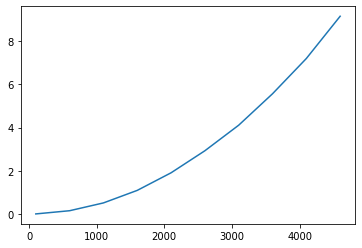

In [21]:
plt.plot(sizes, times)

In [25]:
sizes = list(range(10000, 500000, 50000))
times = []

for n in tqdm(sizes, leave=True, position=0):
    mas = np.random.randint(1, 1000, n)
    start = time.time()
    sorted(mas)
    times.append(time.time() - start)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.68it/s]


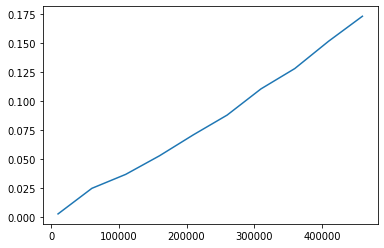

In [26]:
plt.plot(sizes, times)

In [2]:
mas = np.random.randint(1, 1000, 10**7)

In [3]:
%%time
sorted(mas)

Wall time: 3.1 s


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


### Реккурсия, экспонента, динамика

In [13]:
memory = {}

def fib(n):
    if n in memory:
        return memory[n]
    else:
        result = 0
        if n < 2:
            result = 1
        else:
            result = fib(n-1) + fib(n-2)
            
        memory[n] = result
        return result

In [14]:
%%time
fib(50)

Wall time: 0 ns


20365011074

### Графы

In [28]:
n = 6
graph = {i:list(filter(lambda x: x != i, set(np.random.randint(0, n, np.random.randint(n))))) for i in range(n)}

In [29]:
graph

{0: [3, 4], 1: [4], 2: [0, 3, 4], 3: [4, 5], 4: [2, 5], 5: [1, 3]}

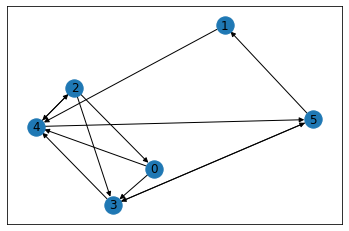

In [30]:
import networkx as nx


G = nx.DiGraph()
for i in range(n):
    G.add_node(i)
for v, neibs in graph.items():
    for neib in neibs:
        G.add_edge(v, neib)
        
nx.draw_networkx(G)

In [32]:
def bfs(v):
    distances = {v:0}
    queue = deque([v])
    while len(queue) > 0:
        vert = queue.popleft()
        for neib in graph[vert]:
            if neib not in distances:
                distances[neib] = distances[vert] + 1
                queue.append(neib)
    return distances

In [33]:
bfs(1)

{1: 0, 4: 1, 2: 2, 5: 2, 0: 3, 3: 3}

In [36]:
visited = set()

def dfs(v):
    print(v)
    visited.add(v)
    for neib in graph[v]:
        if neib not in visited:
            dfs(neib)
            
dfs(1)

1
4
2
0
3
5
